In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("IMDB Dataset.csv")
df.head() # Displaying first five rows

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape # Number of rows and columns

(50000, 2)

In [4]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Observation :
* Dataset contains 50000 rows and 2 columns.
* Dataset contains only categorical features.
* Dataset doesn't contain any null values.

In [5]:
# Checking for total number duplicate rows
df.duplicated().sum()
# Discarding the duplicate rows
df.drop_duplicates(inplace=True)

# Exploring *Sentiment* Feature

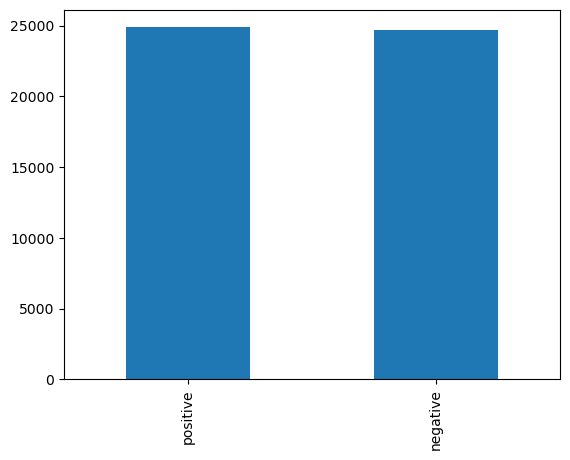

In [6]:
df['sentiment'].value_counts().plot(kind='bar');

### Both postive and negative sentiments have approx same counts.

# Exploring *Review* feature

In [7]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
# Taking sample of 20000 rows only because i m getting memory error while taking all rows
df = df.sample(20000)

# Text Preprocessing

### Lowercasing every alphabets in each rows

In [9]:
df['review']=df['review'].str.lower()

### Removing HTML tags

In [10]:
# Creating a function to remove html tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [11]:
# Applying the function to remove html tags
df['review']=df['review'].apply(remove_html_tags)

### Removing URLs

In [12]:
# Creating a function to remove URLs
def remove_urls(text):
    return re.sub(r'https?://\S+', '', text)
# Applying the function to remove URLs
df['review']=df['review']=df['review'].apply(remove_urls)

### Removing Punctuation

In [13]:
import string
punctuation = set(string.punctuation)
df['review']=df['review'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

### Removing stopwords

In [14]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# Creating a function to remove stopwords
def remove_stopwords(text):
    s = []
    for words in text.split():
        if words not in stopwords:
            s.append(words)
    a = s[:]
    s.clear()
    return ' '.join(a)
# Applying that function in review feature to remove stopwords
df['review']=df['review'].apply(remove_stopwords)

### Stemming

In [15]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# Creating a function to perform stemming
def stemming(text):
    s = []
    for words in text.split():
        s.append(ps.stem(words))
    a = s[:]
    s.clear()
    return ' '.join(a)
# Applying that function in review feature to perform stemming
df['review']=df['review'].apply(stemming)

# Feature Engineering

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment']=encoder.fit_transform(df['sentiment'])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,binary=True)
X = cv.fit_transform(df['review']).toarray() # Independent Variable
y = df.iloc[:,-1].values # Dependent Variable

In [18]:
# Splitng data into test and traning data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Training data on Different Naive Bayes Models

In [19]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
model1 = MultinomialNB()
model2 = BernoulliNB()
model3 = GaussianNB()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [20]:
# Checking Accuarcy of each model
print("Model 1 Accuary: ",accuracy_score(y_test,y_pred1))
print("Model 2 Accuary: ",accuracy_score(y_test,y_pred2))
print("Model 3 Accuary: ",accuracy_score(y_test,y_pred3))

Model 1 Accuary:  0.8495
Model 2 Accuary:  0.851
Model 3 Accuary:  0.7355


* # Hence Our Binomial,Multinomial Naive Bayes Model works better than Gaussian Naive Bayes